In [ ]:
from hossam import load_data
from matplotlib import pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from pandas import DataFrame

In [ ]:
origin = load_data("plant_growth")
origin

[data] https://data.hossam.kr/data/lab03/plant_growth.xlsx
[desc] 신비한 식물의 성장 기록 데이터

field           description
--------------  ----------------------------------------
plant_id        식물의 고유 ID
species         식물의 종 (GlowLeaf, SunPetal, AquaRoot)
height_cm       식물의 키 (cm)
sunlight_hours  일일 평균 햇빛 노출 시간
water_ml        일일 평균 물 공급량 (ml)



,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495
6,SunPetal,25.3,8.2,705
7,SunPetal,24.9,8.1,698
8,SunPetal,25.5,8.3,710
9,SunPetal,25.1,8.0,702


In [ ]:
origin.head()

,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495


In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         20 non-null     object 
 1   height_cm       20 non-null     float64
 2   sunlight_hours  20 non-null     float64
 3   water_ml        20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
origin.isna().sum()

species           0
height_cm         0
sunlight_hours    0
water_ml          0
dtype: int64

In [ ]:
origin['species'].value_counts()


species
GlowLeaf    7
SunPetal    7
AquaRoot    6
Name: count, dtype: int64

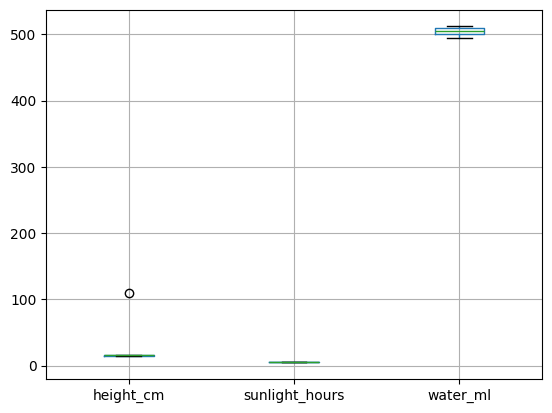

In [ ]:
df1 = origin[origin['species'] == 'GlowLeaf']
df1.boxplot()
plt.show()


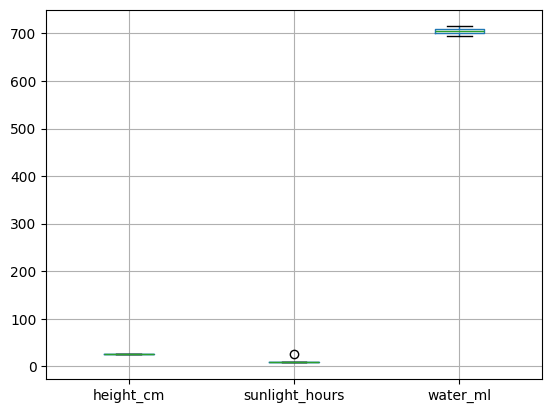

In [ ]:
df1 = origin[origin['species'] == 'SunPetal']
df1.boxplot()
plt.show()


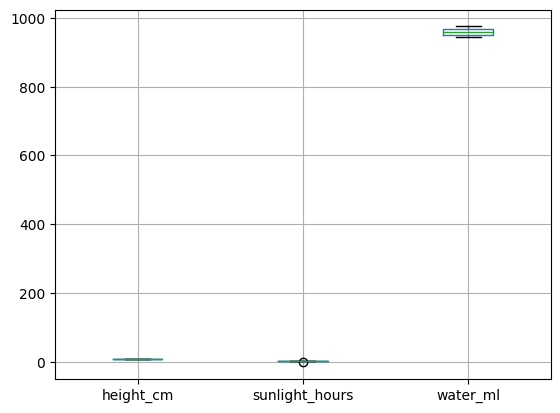

In [ ]:
df1 = origin[origin['species'] == 'AquaRoot']
df1.boxplot()
plt.show()


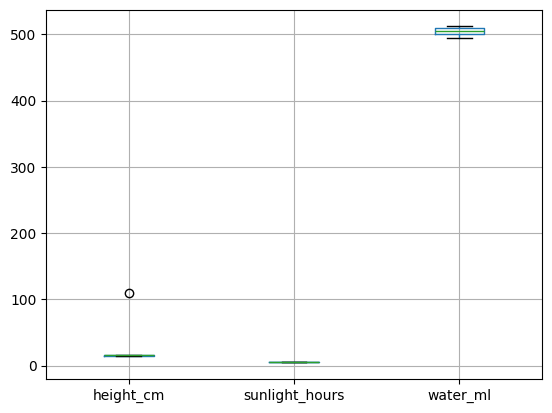

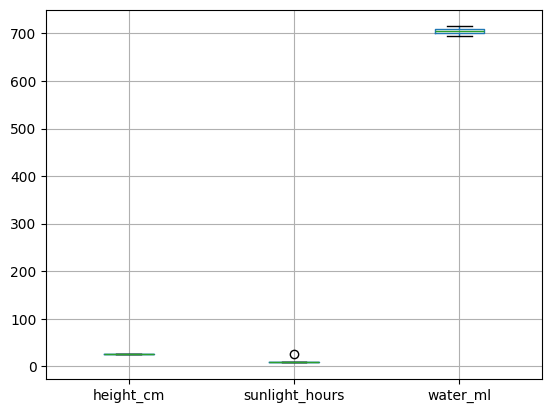

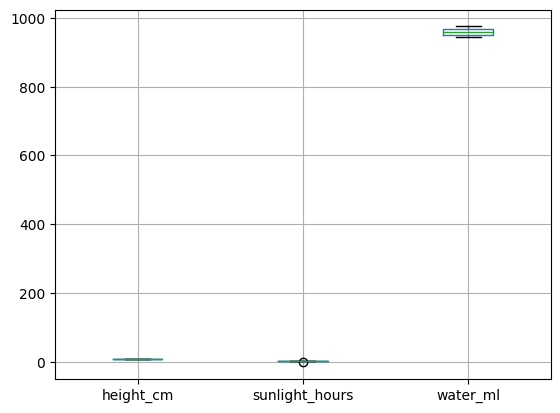

In [ ]:
s = origin['species'].value_counts()

for i in s.index:
    df1 = origin[origin['species'] == i]
    df1.boxplot()
    plt.show()


In [ ]:
df2 = origin.drop(columns='species')
df2

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.2,5.1,505
2,14.8,4.9,498
3,15.5,5.2,510
4,110.0,5.0,502
5,15.1,4.8,495
6,25.3,8.2,705
7,24.9,8.1,698
8,25.5,8.3,710
9,25.1,8.0,702


In [ ]:
height_cm_q1= df2['height_cm'].quantile(0.25)
height_cm_q3= df2['height_cm'].quantile(0.75)
height_cm_iqr = height_cm_q3-height_cm_q1

outline_max = height_cm_q3 + height_cm_iqr * 1.5
outline_min = height_cm_q1 - height_cm_iqr * 1.5

print("height_cm에 대한 iqr: %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f" %
        (height_cm_iqr, outline_min, outline_max))

df2.loc[ (df2['height_cm'] < outline_min) | (df2['height_cm'] > outline_max)]

height_cm에 대한 iqr: 16.45, 하한 이상치 경계: -16.10, 상한 이상치 경계: 49.70


,height_cm,sunlight_hours,water_ml
plant_id,,,
4,110.0,5.0,502


In [ ]:
sunlight_hours_q1= df1['sunlight_hours'].quantile(0.25)
sunlight_hours_q3= df1['sunlight_hours'].quantile(0.75)
sunlight_hours_iqr = sunlight_hours_q3-sunlight_hours_q1

outline_max = sunlight_hours_q3 + sunlight_hours_iqr * 1.5
outline_min = sunlight_hours_q1 - sunlight_hours_iqr * 1.5

print("sunlight_hours에 대한 iqr: %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f" %
        (sunlight_hours_iqr, outline_min, outline_max))

df2.loc[ (df2['sunlight_hours'] < outline_min) | (df2['sunlight_hours'] > outline_max)]

sunlight_hours에 대한 iqr: 0.25, 하한 이상치 경계: 1.65, 상한 이상치 경계: 2.65


,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.2,5.1,505
2,14.8,4.9,498
3,15.5,5.2,510
4,110.0,5.0,502
5,15.1,4.8,495
6,25.3,8.2,705
7,24.9,8.1,698
8,25.5,8.3,710
9,25.1,8.0,702


In [ ]:
df3 = df2.copy()

outline_max = height_cm_q3 + height_cm_iqr * 1.5
outline_min = height_cm_q1 - height_cm_iqr * 1.5
df3.loc[ (df3['height_cm']< outline_min) | (df3['height_cm']> outline_max),'height_cm'] = np.nan

outline_max = sunlight_hours_q3 + sunlight_hours_iqr * 1.5
outline_min = sunlight_hours_q1 - sunlight_hours_iqr * 1.5
df3.loc[ (df3['sunlight_hours']< outline_min) | (df3['sunlight_hours']> outline_max),'sunlight_hours'] = np.nan

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(df3.values)
final_df = DataFrame(df_imr, index=df3.index,
                     columns = df3.columns)
final_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.200000,2.2,505.0
2,14.800000,2.2,498.0
3,15.500000,2.2,510.0
4,16.678947,2.2,502.0
5,15.100000,2.2,495.0
6,25.300000,2.2,705.0
7,24.900000,2.2,698.0
8,25.500000,2.2,710.0
9,25.100000,2.2,702.0
